In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
sales_data = pd.read_csv('project.sales.cities.csv')
acs_data = pd.read_csv('project.acs.cities.csv')
print(sales_data.head())
print(acs_data.head())

          city  category  sale.dollars  sale.volume
0  Cedar Falls      Misc        494165        27993
1  Cedar Falls    Whisky       1568696        93104
2  Cedar Falls       Rum        809757        57070
3  Cedar Falls    Brandy         80056         4982
4  Cedar Falls  Amaretto         21811         2194
       city  high.school  bachelor  unemployment   income  population  \
0    Ackley         88.8      20.0           4.0  30790.0        1738   
1  Ackworth         85.5      12.7           9.1  41250.0          66   
2     Adair         96.6      19.0           6.8  32639.0         813   
3      Adel         93.7      32.0           3.1  37130.0        4030   
4     Afton         89.4      11.5           5.7  27457.0         967   

   pop.white  pop.black  pop.indian  pop.asian  pop.hawai  pop.other  \
0       1715          0           0          0          0         15   
1         66          0           0          0          0          0   
2        788          4          

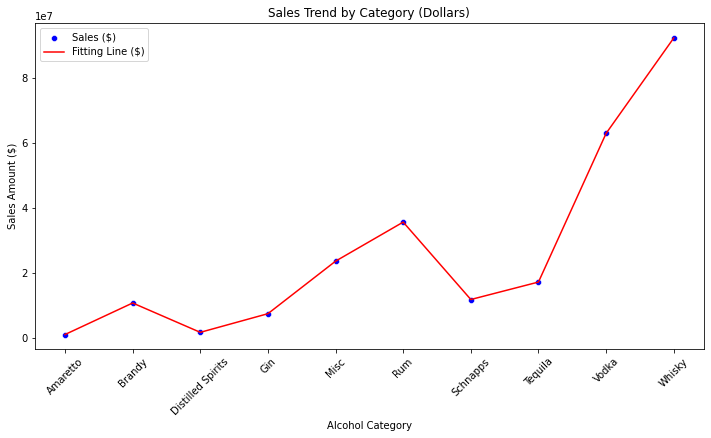

In [3]:
sales_trend = sales_data.groupby('category')[['sale.dollars', 'sale.volume']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='category', y='sale.dollars', data=sales_trend, color="blue", label="Sales ($)")
sns.lineplot(x='category', y='sale.dollars', data=sales_trend, color="red", label="Fitting Line ($)")
plt.xticks(rotation=45)
plt.title("Sales Trend by Category (Dollars)")
plt.xlabel("Alcohol Category")
plt.ylabel("Sales Amount ($)")
plt.legend()
plt.show()

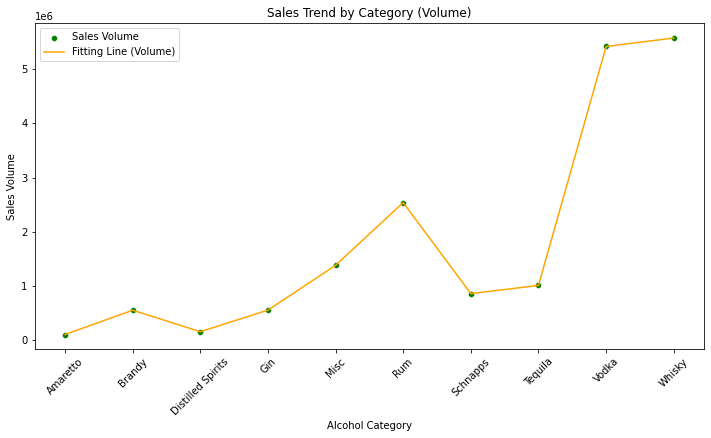

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='category', y='sale.volume', data=sales_trend, color="green", label="Sales Volume")
sns.lineplot(x='category', y='sale.volume', data=sales_trend, color="orange", label="Fitting Line (Volume)")
plt.xticks(rotation=45)
plt.title("Sales Trend by Category (Volume)")
plt.xlabel("Alcohol Category")
plt.ylabel("Sales Volume")
plt.legend()
plt.show()

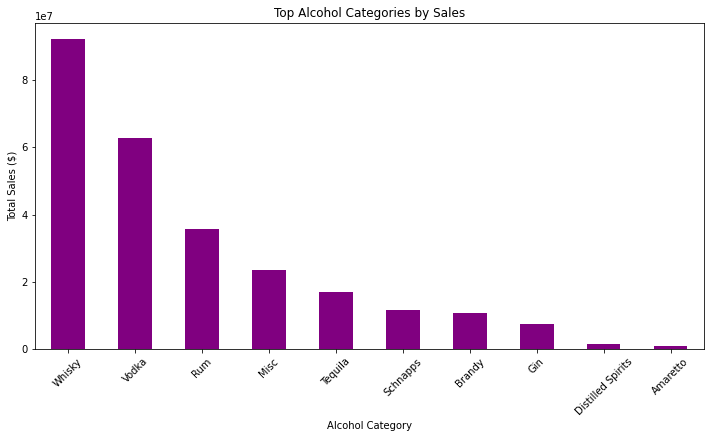

In [5]:
top_categories = sales_data.groupby('category')['sale.dollars'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='purple')
plt.title("Top Alcohol Categories by Sales")
plt.xlabel("Alcohol Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

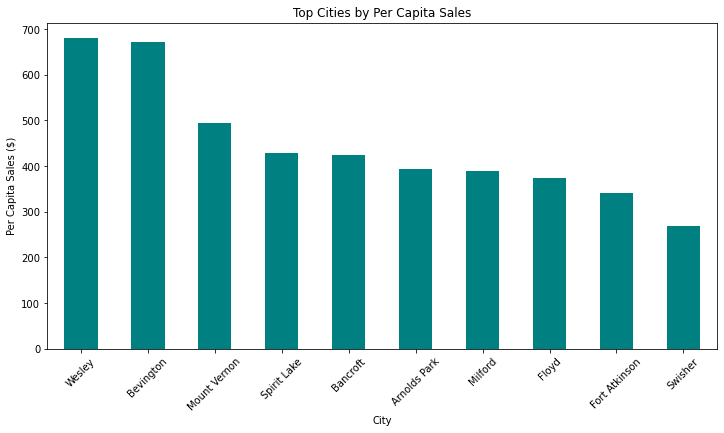

In [8]:
merged_data = pd.merge(sales_data, acs_data, on='city')
merged_data['per_capita_sales'] = merged_data['sale.dollars'] / merged_data['population']
top_cities = merged_data.groupby('city')['per_capita_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='teal')
plt.title("Top Cities by Per Capita Sales")
plt.xlabel("City")
plt.ylabel("Per Capita Sales ($)")
plt.xticks(rotation=45)
plt.show()

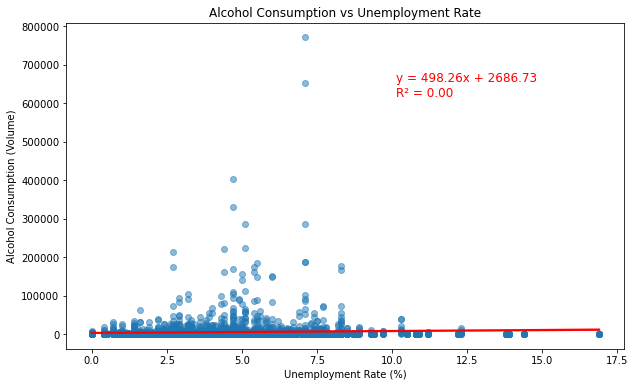

In [23]:
from scipy.stats import linregress
plt.figure(figsize=(10, 6))
x = merged_data['unemployment']
y = merged_data['sale.volume']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
sns.regplot(
    x=x, 
    y=y, 
    data=merged_data, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}
)
##formula
formula_text = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
plt.text(
    x.max() * 0.6, 
    y.max() * 0.8, 
    formula_text, 
    fontsize=12, 
    color='red', 
)
plt.title("Alcohol Consumption vs Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Alcohol Consumption (Volume)")
plt.show()

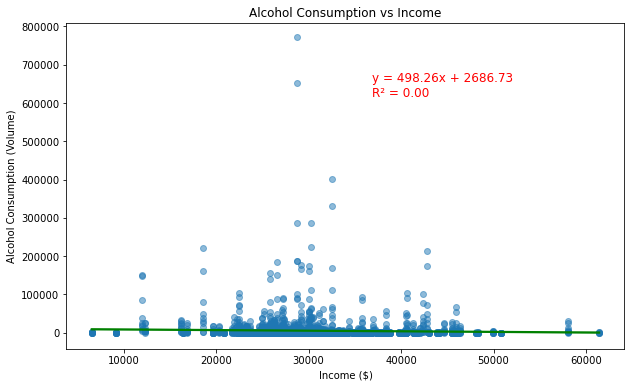

In [25]:
plt.figure(figsize=(10, 6))
x = merged_data['income']
y = merged_data['sale.volume']
sns.regplot(
    x=x1, 
    y=y1, 
    data=merged_data, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'green'}
)
formula_text = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
plt.text(
    x1.max() * 0.6, 
    y1.max() * 0.8, 
    formula_text, 
    fontsize=12, 
    color='red', 
)
plt.title("Alcohol Consumption vs Income")
plt.xlabel("Income ($)")
plt.ylabel("Alcohol Consumption (Volume)")
plt.show()

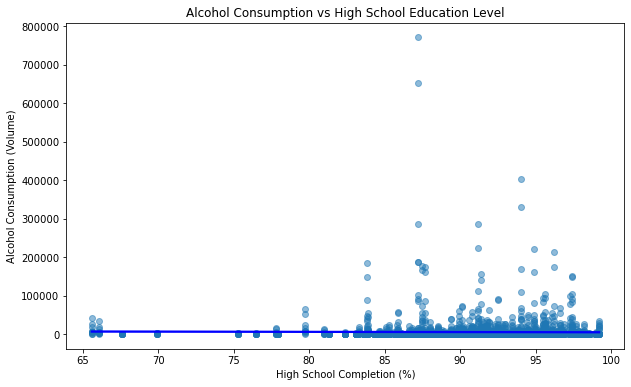

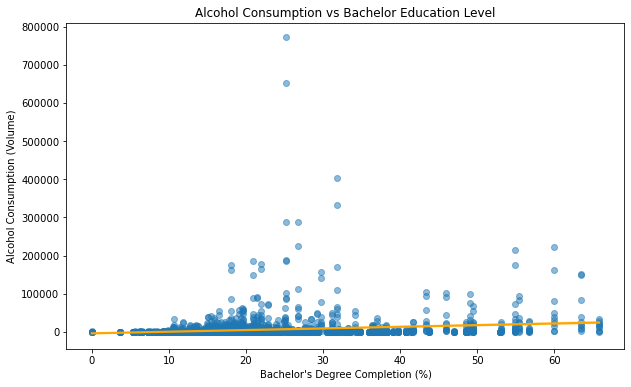

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='high.school', 
    y='sale.volume', 
    data=merged_data, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'blue'}
)
plt.title("Alcohol Consumption vs High School Education Level")
plt.xlabel("High School Completion (%)")
plt.ylabel("Alcohol Consumption (Volume)")
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(
    x='bachelor', 
    y='sale.volume', 
    data=merged_data, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'orange'}
)
plt.title("Alcohol Consumption vs Bachelor Education Level")
plt.xlabel("Bachelor's Degree Completion (%)")
plt.ylabel("Alcohol Consumption (Volume)")
plt.show()